In [ ]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)

CSV_PATH = "Chicago_Shooting_Dataset.csv"

In [5]:
# Load the dataset and apply light cleaning for consistency
df = pd.read_csv(CSV_PATH, low_memory=False)

# Standardize text columns to uppercase to avoid category duplicates
def to_upper_strip(s):
    try:
        return s.astype(str).str.upper().str.strip()
    except Exception:
        return s

for col in ["Primary Type", "Description", "Location Description"]:
    if col in df.columns:
        df[col] = to_upper_strip(df[col])

# Parse any available date column and create time-related fields
dt_col = next((c for c in ["date_standardized", "Date", "DATE", "Incident Date", "INCIDENT_DATE"] if c in df.columns), None)
if dt_col:
    df["_dt"] = pd.to_datetime(df[dt_col], errors="coerce", infer_datetime_format=True)
    df["year"] = df["_dt"].dt.year
    df["month"] = df["_dt"].dt.month
    df["day_of_week"] = df["_dt"].dt.day_name()
    df["hour"] = df["_dt"].dt.hour
else:
    df["_dt"] = pd.NaT

# Display shape and a few sample rows to confirm data integrity
display(df.shape)
display(df.head(3))


C:\Users\Administrator\AppData\Local\Temp\ipykernel_3764\281022142.py:18: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df["_dt"] = pd.to_datetime(df[dt_col], errors="coerce", infer_datetime_format=True)


(1723, 17)

,ID,Case Number,Date,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,Latitude,Longitude,_dt,year,month,day_of_week,hour
0,13894362,JJ326433,2025-07-08 20:13:00,STREET,True,False,111,1,42,32,41.888104,-87.625549,2025-07-08 20:13:00,2025,7,Tuesday,20
1,13893362,JJ325283,2025-07-08 01:56:00,GAS STATION,False,False,424,4,7,46,41.744647,-87.552238,2025-07-08 01:56:00,2025,7,Tuesday,1
2,13891960,JJ323643,2025-07-06 19:58:00,PARK PROPERTY,True,False,1915,19,46,3,41.962412,-87.634908,2025-07-06 19:58:00,2025,7,Sunday,19


ID                      0
Case Number             0
Date                    0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
Latitude                0
Longitude               0
_dt                     0
year                    0
month                   0
day_of_week             0
hour                    0
dtype: int64

,count,mean,std,min,25%,50%,75%,max,median
ID,1723.0,1.262541e+07,555732.005678,7.177217e+06,1.217114e+07,1.248890e+07,1.304044e+07,1.389436e+07,1.248890e+07
Beat,1723.0,9.600592e+02,637.888348,1.110000e+02,6.110000e+02,6.330000e+02,1.411000e+03,2.535000e+03,6.330000e+02
District,1723.0,9.367963e+00,6.373887,1.000000e+00,6.000000e+00,6.000000e+00,1.400000e+01,2.500000e+01,6.000000e+00
Ward,1723.0,1.855427e+01,12.040960,1.000000e+00,8.000000e+00,1.700000e+01,2.700000e+01,5.000000e+01,1.700000e+01
Community Area,1723.0,4.474811e+01,20.117377,1.000000e+00,2.700000e+01,4.400000e+01,6.650000e+01,7.700000e+01,4.400000e+01
Latitude,1723.0,4.180799e+01,0.085023,4.164461e+01,4.174536e+01,4.176649e+01,4.188019e+01,4.202178e+01,4.176649e+01
Longitude,1723.0,-8.765571e+01,0.062951,-8.790646e+01,-8.769865e+01,-8.764897e+01,-8.761189e+01,-8.752924e+01,-8.764897e+01
year,1723.0,2.021557e+03,1.582629,2.009000e+03,2.020000e+03,2.021000e+03,2.023000e+03,2.025000e+03,2.021000e+03
month,1723.0,6.465467e+00,3.210636,1.000000e+00,4.000000e+00,6.000000e+00,9.000000e+00,1.200000e+01,6.000000e+00
hour,1723.0,1.085374e+01,8.403899,0.000000e+00,2.000000e+00,1.100000e+01,1.900000e+01,2.300000e+01,1.100000e+01


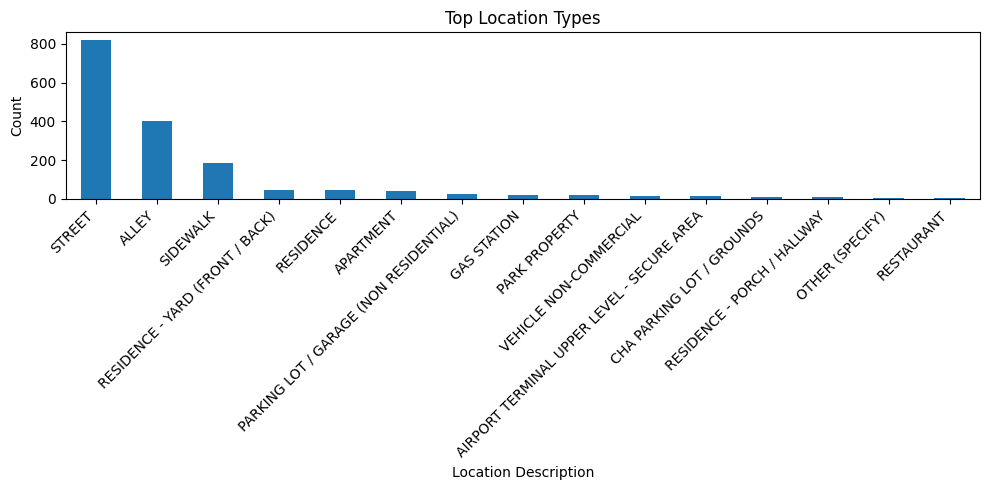

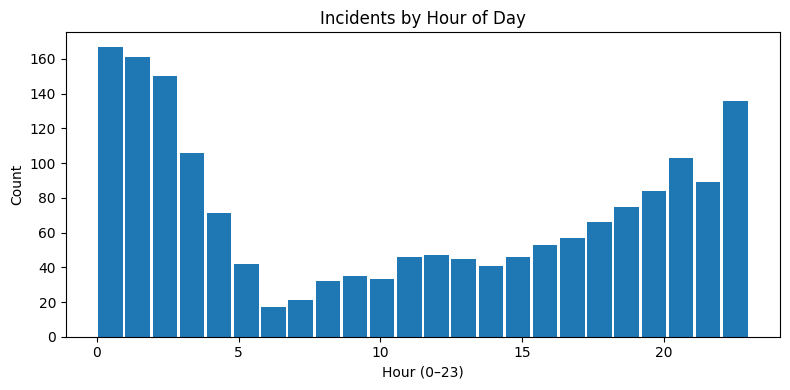

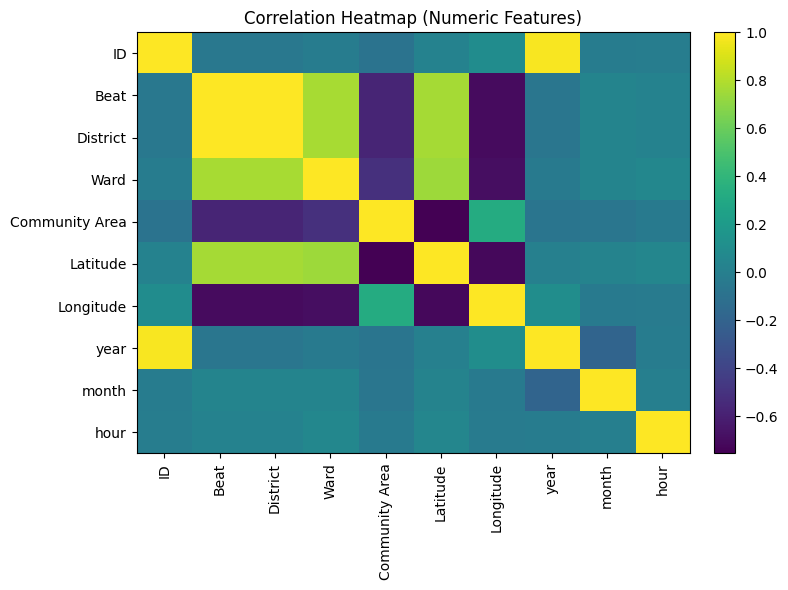

In [7]:
# Generate summary statistics and inspect missing values
missing_counts = df.isna().sum().sort_values(ascending=False)
display(missing_counts.head(20))

numeric_df = df.select_dtypes(include=[np.number])
num_summary = numeric_df.describe().T
num_summary["median"] = numeric_df.median(numeric_only=True)
display(num_summary.head(20))

# Plot the most common location types
if "Location Description" in df.columns:
    s = df["Location Description"].value_counts().head(15)
    if len(s) > 0:
        plt.figure(figsize=(10, 5))
        s.plot(kind="bar")
        plt.title("Top Location Types")
        plt.ylabel("Count")
        plt.xticks(rotation=45, ha="right")
        plt.tight_layout()
        plt.show()

# Plot the hourly distribution of incidents
if "hour" in df.columns and df["hour"].notna().any():
    plt.figure(figsize=(8, 4))
    df["hour"].dropna().astype(int).plot(kind="hist", bins=24, rwidth=0.9)
    plt.title("Incidents by Hour of Day")
    plt.xlabel("Hour (0–23)")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

# Extract and visualize weapon types from the description column
weapon_patterns = {
    "HANDGUN": r"\bHANDGUN\b",
    "RIFLE": r"\bRIFLE\b",
    "SHOTGUN": r"\bSHOTGUN\b",
    "OTHER FIREARM": r"\bOTHER FIREARM\b|\bFIREARM\b|\bAIR RIFLE\b",
}
def map_weapon(desc):
    if pd.isna(desc):
        return np.nan
    for label, pattern in weapon_patterns.items():
        if re.search(pattern, str(desc), flags=re.IGNORECASE):
            return label
    return "UNSPECIFIED"

if "Description" in df.columns:
    df["weapon_category"] = df["Description"].apply(map_weapon)
    s = df["weapon_category"].value_counts().head(15)
    if len(s) > 0:
        plt.figure(figsize=(8, 4))
        s.plot(kind="bar")
        plt.title("Weapon Category (derived from Description)")
        plt.ylabel("Count")
        plt.xticks(rotation=30, ha="right")
        plt.tight_layout()
        plt.show()

# Visualize correlations among numeric variables if available
if numeric_df.shape[1] > 1:
    corr = numeric_df.corr(numeric_only=True)
    plt.figure(figsize=(8, 6))
    im = plt.imshow(corr, aspect='auto', interpolation='nearest')
    plt.colorbar(im, fraction=0.046, pad=0.04)
    plt.title("Correlation Heatmap (Numeric Features)")
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.index)), corr.index)
    plt.tight_layout()
    plt.show()


In [8]:
# Identify numeric outliers using the IQR rule
def iqr_flags(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    if iqr == 0 or np.isnan(iqr):
        return pd.Series(False, index=series.index)
    lower, upper = q1 - 1.5 * iqr, q3 + 1.5 * iqr
    return (series < lower) | (series > upper)

outlier_counts = []
for col in numeric_df.columns:
    s = df[col].dropna()
    if s.empty:
        outlier_counts.append((col, 0))
    else:
        flags = iqr_flags(df[col])
        outlier_counts.append((col, int(flags.sum())))

outlier_df = pd.DataFrame(outlier_counts, columns=["column", "iqr_outliers"]).sort_values("iqr_outliers", ascending=False)
display(outlier_df.head(20))

# Perform simple logical checks for geographic or administrative inconsistencies
checks = {}

if "Community Area" in df.columns:
    valid = df["Community Area"].dropna()
    checks["Community Area_out_of_range"] = int((~valid.between(1, 77)).sum())

if "Ward" in df.columns:
    valid = df["Ward"].dropna()
    checks["Ward_out_of_range"] = int((~valid.between(1, 50)).sum())

if "Latitude" in df.columns:
    valid = df["Latitude"].dropna()
    checks["Latitude_out_of_bbox"] = int((~valid.between(41.0, 42.5)).sum())

if "Longitude" in df.columns:
    valid = df["Longitude"].dropna()
    checks["Longitude_out_of_bbox"] = int((~valid.between(-88.0, -87.0)).sum())

for c in ["Primary Type", "Description", "Location Description"]:
    if c in df.columns:
        checks[f"{c}_missing"] = int(df[c].isna().sum())

# Display the results of consistency checks
checks


,column,iqr_outliers
6,Longitude,13
0,ID,4
7,year,2
1,Beat,0
2,District,0
3,Ward,0
5,Latitude,0
4,Community Area,0
8,month,0
9,hour,0


{'Community Area_out_of_range': 0,
 'Ward_out_of_range': 0,
 'Latitude_out_of_bbox': 0,
 'Longitude_out_of_bbox': 0,
 'Location Description_missing': 0}

The dataset includes 1,723 homicide-related records, all of which are complete with no missing values across time, location, and geographic variables. Numeric fields such as Beat, District, Ward, and Community Area fall within valid ranges, showing the dataset is clean and internally consistent.

The location distribution shows that most incidents occurred on streets, followed by alleys and sidewalks, while residential areas like front or back yards and apartments appear far less often. This indicates that shootings primarily occur in public, outdoor environments rather than within private residences.

The hourly distribution reveals clear time-of-day patterns. Homicide incidents peak around midnight to 2 a.m., decrease sharply before sunrise, and gradually rise again during the evening hours (around 9–11 p.m.). This suggests that violent activity is concentrated late at night, likely when more social or street-level interactions occur.

The correlation heatmap shows only mild positive relationships between geographic variables such as Beat, District, Ward, and Latitude, reflecting their shared spatial structure. Other variables show little to no correlation, confirming that the dataset has minimal redundancy and no strong multicollinearity.